Exploratory Data Analysis
-How many countries affected 
-Number of cases (confirmed or suspected)
-Top countries affected
-Distribution per continent 
-Number of cases per day
-Most common symptoms 

In [1]:
#python packages
import pandas as pd
import numpy as np

#visual packages 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#missing values 
import missingno as msno

#common words using wordcloud 
from wordcloud import WordCloud

In [2]:
data_url = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

In [3]:
#load dataset 
df = pd.read_csv(data_url)

In [4]:
df.head()

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Confirmation_method,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,2022-05-18


In [5]:
#shape 
df.shape

(13169, 35)

In [6]:
#datatypes 
df.dtypes

ID                          object
Status                      object
Location                    object
City                        object
Country                     object
Country_ISO3                object
Age                         object
Gender                      object
Date_onset                  object
Date_confirmation           object
Symptoms                    object
Hospitalised (Y/N/NA)       object
Date_hospitalisation        object
Isolated (Y/N/NA)           object
Date_isolation              object
Outcome                     object
Contact_comment             object
Contact_ID                 float64
Contact_location            object
Travel_history (Y/N/NA)     object
Travel_history_entry        object
Travel_history_start        object
Travel_history_location     object
Travel_history_country      object
Genomics_Metadata           object
Confirmation_method         object
Source                      object
Source_II                   object
Source_III          

In [7]:
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_last_modified'],
      dtype='object')

Distribution of Cases per Location (Country and City)

In [8]:
#how many countries in df
df['Country'].unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

In [9]:
#no of countries 
len(df['Country'].unique())

94

In [10]:
#distribution per country
#confirmed/suspected
df['Country'].value_counts()

Spain                               2633
Germany                             1694
England                             1660
Democratic Republic Of The Congo    1583
United States                       1074
                                    ... 
Malawi                                 1
Venezuela                              1
Georgia                                1
Lebanon                                1
Estonia                                1
Name: Country, Length: 94, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

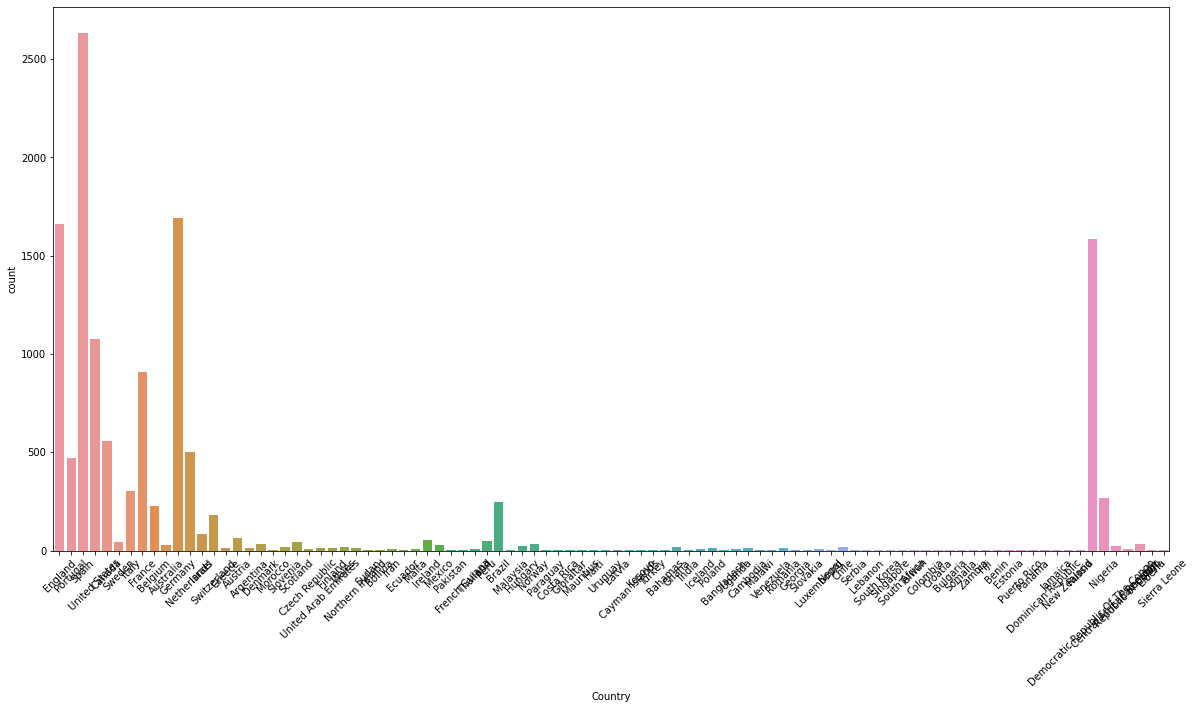

In [11]:
#visualization per country
plt.figure(figsize=(20,10))
sns.countplot(x='Country',data=df)
plt.xticks(rotation=45)
plt.show

In [12]:
#interactive plot of cases per country
casespercountry = df.groupby('Country')['Status'].count().reset_index()

In [13]:
casespercountry['Status'].nlargest()

80    2633
31    1694
24    1660
20    1583
89    1074
Name: Status, dtype: int64

In [14]:
#top countries affected with reported cases
casespercountry.nlargest(n=10,columns='Status')

,Country,Status
80,Spain,2633
31,Germany,1694
24,England,1660
20,Democratic Republic Of The Congo,1583
89,United States,1074
28,France,909
12,Canada,558
56,Netherlands,503
66,Portugal,473
42,Italy,301


In [15]:
#plot 
fig = px.bar(casespercountry, x='Country', y='Status',color='Country')
fig.show()

In [16]:
#cities in the top countries having the most cases
#england 
df[df['Country'] == 'England'].groupby('City')['Status'].count()

City
London        7
Newcastle     1
South East    1
Name: Status, dtype: int64

In [17]:
#spain 
df[df['Country'] == 'Spain'].groupby('City')['Status'].count()

City
Almeria            3
Aragon             2
Barcelona          1
Cadiz              3
Costa del Sol      1
Formentera         1
Fuerteventura      2
Gran Canaria      16
Madrid           121
Malaga            16
Seville            2
Tenerife           4
Valencia           2
Valladolid         1
Name: Status, dtype: int64

In [18]:
#USA 
df[df['Country'] == 'United States'].groupby('City')['Status'].size()

City
Boston            1
Chicago           7
Dallas            1
Denver            1
Forest Park       1
Kansas City       1
Philadelphia      2
Sacramento        1
San Francisco    20
San Francsico    16
Washington DC     1
Name: Status, dtype: int64

In [19]:
#cities having the most cases
df.groupby('City')['Status'].count().reset_index()

,City,Status
0,Aachen,1
1,Almeria,3
2,Ancona,1
3,Ansbach,1
4,Antwerp,2
...,...,...
157,Warsaw,1
158,Washington DC,1
159,Windsor,2
160,York,1


In [20]:
#method 2
df['City'].value_counts()

Toronto          186
Madrid           121
Montreal          63
Berlin            48
San Francisco     20
                ... 
Palermo            1
Sacramento         1
Canicatti          1
Marseille          1
Brandenburg        1
Name: City, Length: 162, dtype: int64

<AxesSubplot:>

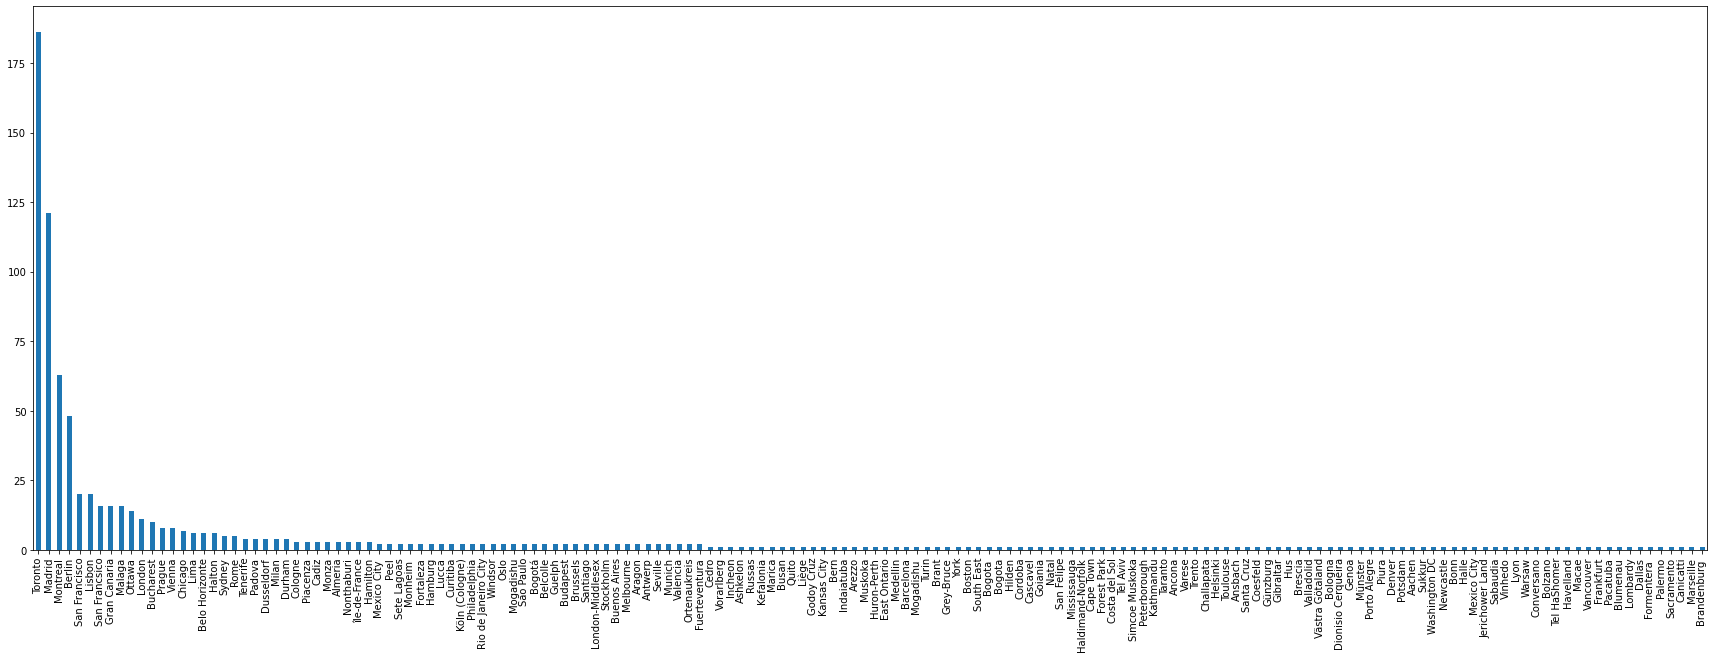

In [21]:
plt.figure(figsize=(30,10))
df['City'].value_counts().plot(kind='bar')

In [26]:
#interactive plot of city per country confirmed/suspected
casespercity = df.groupby('City')['Status'].count().reset_index()

In [27]:
casespercity

,City,Status
0,Aachen,1
1,Almeria,3
2,Ancona,1
3,Ansbach,1
4,Antwerp,2
...,...,...
157,Warsaw,1
158,Washington DC,1
159,Windsor,2
160,York,1


In [28]:
def plot_distribution(data,x,y):
    #plot
    fig = px.bar(data,x=x,y=y,color=x)
    fig.show()

In [29]:
plot_distribution(casespercity,'City','Status')

In [30]:
#confirmed cases
df['Status']

0        confirmed
1        confirmed
2        confirmed
3        confirmed
4        confirmed
           ...    
13164    confirmed
13165    confirmed
13166    confirmed
13167    confirmed
13168    confirmed
Name: Status, Length: 13169, dtype: object

<AxesSubplot:xlabel='Status', ylabel='count'>

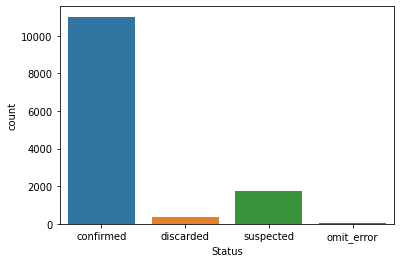

In [31]:
#status distribution
sns.countplot(x='Status',data=df)

In [32]:
#different status per country
df.groupby(['Status','Country']).size()

Status     Country  
confirmed  Argentina     12
           Australia     28
           Austria       62
           Belgium      224
           Benin          3
                       ... 
suspected  Somalia        3
           Sudan          1
           Uganda         6
           Uruguay        1
           Zambia         1
Length: 124, dtype: int64

In [34]:
#different types of status per the top affected/reported cases per country
df['Country'].value_counts().to_frame().nlargest(10,'Country')

,Country
Spain,2633
Germany,1694
England,1660
Democratic Republic Of The Congo,1583
United States,1074
France,909
Canada,558
Netherlands,503
Portugal,473
Italy,301


In [36]:
#getting only the names of the countries
top_reported_countries=list(df['Country'].value_counts().to_frame().nlargest(10,'Country').index)

In [37]:
top_reported_countries

['Spain',
 'Germany',
 'England',
 'Democratic Republic Of The Congo',
 'United States',
 'France',
 'Canada',
 'Netherlands',
 'Portugal',
 'Italy']

In [42]:
top_countries_df = df[df['Country'].isin(top_reported_countries)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'Democratic Republic Of The Congo')])

<Figure size 2160x3600 with 0 Axes>

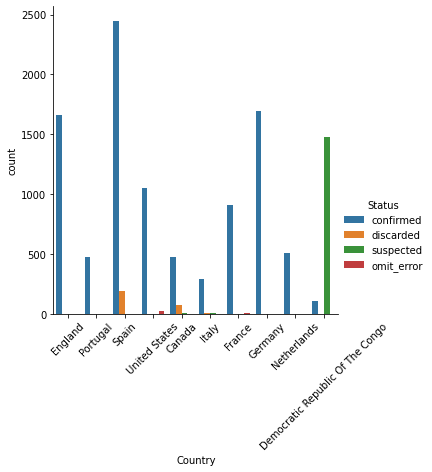

In [49]:
plt.figure(figsize=(30,50))
sns.catplot(data=top_countries_df,kind='count',x='Country',hue='Status')
plt.xticks(rotation=45)

In [50]:
#frequency of Symptoms/Most freq symptoms

In [51]:
#symptoms reported
df['Symptoms'].unique()

array(['rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions', nan, 'oral and genital ulcers, fever',
       'lesions', 'perianal papules; inguinal adenopathy',
       'genital ulcers', 'genital rash',
       'Slight swallowing difficulties and an elevated temperature',
       'fever, rash', 'skin rashes', 'fever, lesions', 'pustules, fever',
       'skin lesions', 'fever, cough, skin lesions',
       'fever, pustules on hands, body pains', 'blisters, high fever',
       'genital ulcer lesions', 'muscle aches, fever, skin lesions',
       'blisters', 'fever, skin lesions',
       'erythema with vesicles and papules, difficulty breathing, headache, fever',
       'skin lesions, spots on skin, severe anemia',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'fever, fatigue, headache, muscle pain',
       'skin rashes, dysphagia, muscle pain, fever, decreased physical strength, enlarged lymph nodes',
       'fever, outbreak on the sk

In [57]:
#frequency of most common sign/symptoms
docx = ' '.join(df['Symptoms'].fillna('0').to_list())

In [58]:
#using plot fucn to make a word cloud
def plot_wordcloud(text):
    mywordcloud = WordCloud().generate(text)
    plt.imshow(mywordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show(block="True")

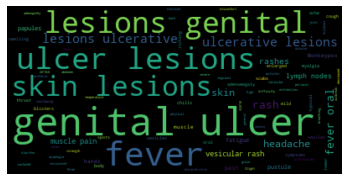

In [59]:
plot_wordcloud(docx)

In [60]:
from collections import Counter
word_freq = Counter(docx.split())

In [61]:
word_freq.most_common(10)

[('0', 13023),
 ('lesions', 71),
 ('genital', 53),
 ('skin', 35),
 ('ulcer', 30),
 ('fever', 25),
 ('fever,', 24),
 ('and', 23),
 ('ulcerative', 21),
 ('rash', 18)]

Number of Cases Per Day/Time series


In [62]:
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_last_modified'],
      dtype='object')

In [64]:
pd.to_datetime(df['Date_confirmation'])

0       2022-05-06
1       2022-05-12
2       2022-05-13
3       2022-05-15
4       2022-05-15
           ...    
13164   2022-06-05
13165   2022-06-05
13166   2022-06-05
13167   2022-06-05
13168   2022-06-05
Name: Date_confirmation, Length: 13169, dtype: datetime64[ns]

AttributeError: 'Figure' object has no attribute 'autofmt_xdate'

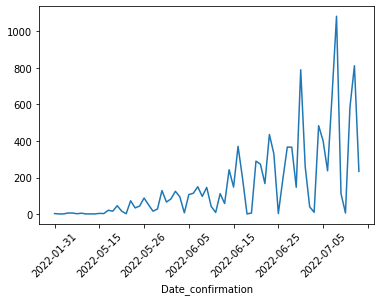

In [68]:
#distribution per time/number of cases per day based on date_confirmation (visualizing it)
df.groupby('Date_confirmation')['Status'].size().plot(kind='line')
plt.xticks(rotation=45)
fig.autofmt_xdate()

In [69]:
#day/weekend or week
#day which has the highest confirmation
pd.to_datetime(df['Date_confirmation']).dt.day_name().value_counts()

Thursday     2628
Tuesday      2350
Friday       2104
Monday       2104
Wednesday    1178
Sunday        471
Saturday      210
Name: Date_confirmation, dtype: int64

<AxesSubplot:>

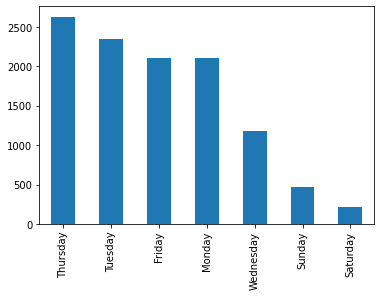

In [70]:
#plotting above data into a graph
pd.to_datetime(df['Date_confirmation']).dt.day_name().value_counts().plot(kind='bar')